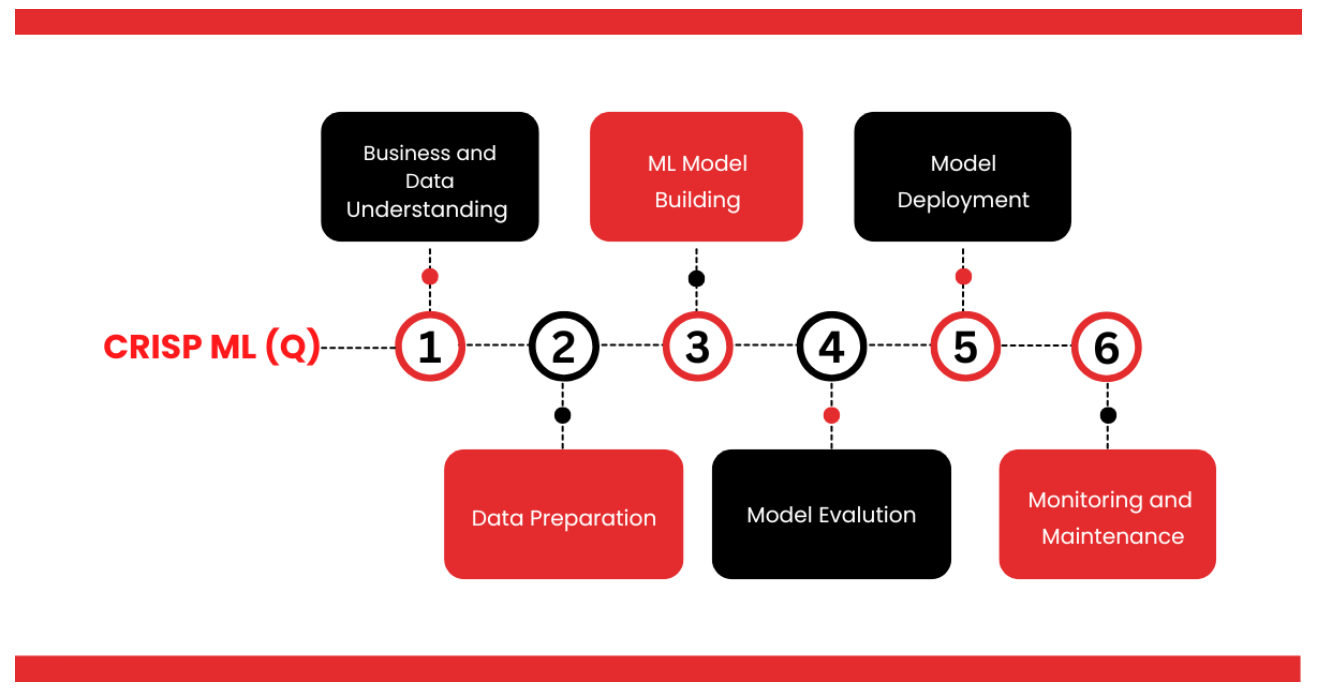



##  **Business Problem**

Early and accurate detection of cancer (such as breast, lung, or skin cancer) significantly increases the chances of successful treatment and survival. However, traditional diagnostic methods like biopsies, MRIs, or mammograms can be time-consuming, expensive, and error-prone when dependent solely on human interpretation.

###  Goal:

Healthcare providers want to **automate or assist cancer diagnosis** using historical patient data to improve diagnostic accuracy, reduce human error, and enable early intervention.

---

##  **Objective**

Develop a **Machine Learning model** that can predict whether a patient has cancer based on features such as:

* Tumor size
* Cell characteristics (e.g., uniformity, texture)
* Medical history
* Imaging results (processed into features)

The model should:

* Maximize prediction accuracy (e.g., precision, recall)
* Minimize false negatives (missing a cancer case)
* Be interpretable for use by clinicians

---

##  **Constraints**

| Type                 | Constraints                                                                                  |
| -------------------- | -------------------------------------------------------------------------------------------- |
| **Data**             | Limited labeled data for rare cancer types; noisy or incomplete medical records              |
| **Performance**      | Must maintain high **recall** (to avoid false negatives), even at the cost of some precision |
| **Interpretability** | Clinicians require explanations for decisions; model can't be a total black box              |
| **Regulations**      | Must comply with **HIPAA**, **GDPR**, and medical device software regulations                |
| **Deployment**       | Needs integration with hospital systems and electronic health records (EHRs)                 |
| **Latency**          | Predictions must be quick, especially in urgent care situations                              |

---

##  **Applications**

| Area                  | How ML Cancer Prediction Helps                                                 |
| --------------------- | ------------------------------------------------------------------------------ |
| **Hospitals/Clinics** | Assists radiologists in detecting cancer from imaging scans (e.g., mammograms) |
| **Telemedicine**      | Enables remote screening where specialists are unavailable                     |
| **Pathology Labs**    | Automatically classifies cell samples in biopsy images                         |
| **Pharma/Biotech**    | Helps in identifying high-risk individuals for clinical trials                 |
| **Wearable Devices**  | Monitors biomarkers or skin lesions for early warning signs                    |

---



In [117]:
import pandas as pd

In [118]:
df=pd.read_csv(r"cancer_prediction_data (2).csv")
df

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1
...,...,...,...,...,...,...,...,...,...,...
1995,53.0,NaN,4.058134,High,Mild,No,Current Smoker,Low,NaN,0
1996,57.0,Female,5.542532,High,Moderate,Yes,Former Smoker,High,Occasionally,1
1997,NaN,Female,0.866000,Medium,Mild,NaN,Non-Smoker,High,Never,0
1998,47.0,NaN,7.859645,Low,Severe,Yes,Former Smoker,NaN,Rarely,1


## Data Preprocessing

In [119]:
num_cols=['Age','Tumor_Size']
nominal_cols=['Gender','Family_History','Smoking_History','Exercise_Frequency']
ordinal_cols=['Tumor_Grade','Symptoms_Severity','Alcohol_Consumption']

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [121]:
nominal_pl=Pipeline([('Mode Imputation',SimpleImputer(strategy='most_frequent')),('One hot encoding',OneHotEncoder(sparse_output=False,drop='first'))])

In [122]:
nominal_pl

Pipeline(steps=[('Mode Imputation', SimpleImputer(strategy='most_frequent')),
                ('One hot encoding',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [123]:
df['Alcohol_Consumption'].unique()

array(['Moderate', nan, 'High', 'Low'], dtype=object)

In [124]:
order=[['Low','Medium','High'],['Mild','Moderate','Severe'],['Low','Moderate','High']]

In [125]:
ordinal_pl=Pipeline([('mode imputation',SimpleImputer(strategy='most_frequent')),('ordinal encoding',OrdinalEncoder(categories=order,dtype='int'))])

In [126]:
ordinal_pl

Pipeline(steps=[('mode imputation', SimpleImputer(strategy='most_frequent')),
                ('ordinal encoding',
                 OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                            ['Mild', 'Moderate', 'Severe'],
                                            ['Low', 'Moderate', 'High']],
                                dtype='int'))])

In [127]:
numerical_pl=Pipeline([('mean imputation',SimpleImputer(strategy='mean')),('feature scaling',StandardScaler()),
                        ('feature transformation',PowerTransformer())])

In [128]:
numerical_pl

Pipeline(steps=[('mean imputation', SimpleImputer()),
                ('feature scaling', StandardScaler()),
                ('feature transformation', PowerTransformer())])

In [129]:
from sklearn.compose import ColumnTransformer

In [148]:
preprocessor=ColumnTransformer([('nominal',nominal_pl,nominal_cols),('ordinal',ordinal_pl,ordinal_cols),
                      ('numerical',numerical_pl,num_cols)],remainder='passthrough')

In [149]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nominal',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('One hot encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Gender', 'Family_History', 'Smoking_History',
                                  'Exercise_Frequency']),
                                ('ordinal',
                                 Pipeline(steps=[('mode imputation',
                                                  SimpleImputer(strategy='mo...
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Mild',
                                                                              'Moderate',
                                                                              'Severe'],
                                                                             ['Low',
                                                                              'Moderate',
                                                                              'High']],
                                                                 dtype='int'))]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption']),
                                ('numerical',
                                 Pipeline(steps=[('mean imputation',
                                                  SimpleImputer()),
                                                 ('feature scaling',
                                                  StandardScaler()),
                                                 ('feature transformation',
                                                  PowerTransformer())]),
                                 ['Age', 'Tumor_Size'])])

In [150]:
X=df.drop(columns=['Cancer_Present'])

In [151]:
X

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally
...,...,...,...,...,...,...,...,...,...
1995,53.0,NaN,4.058134,High,Mild,No,Current Smoker,Low,NaN
1996,57.0,Female,5.542532,High,Moderate,Yes,Former Smoker,High,Occasionally
1997,NaN,Female,0.866000,Medium,Mild,NaN,Non-Smoker,High,Never
1998,47.0,NaN,7.859645,Low,Severe,Yes,Former Smoker,NaN,Rarely


In [152]:
y=df['Cancer_Present']

In [153]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Cancer_Present, Length: 2000, dtype: int64

## Model Building

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [156]:
X_train.columns

Index(['Age', 'Gender', 'Tumor_Size', 'Tumor_Grade', 'Symptoms_Severity',
       'Family_History', 'Smoking_History', 'Alcohol_Consumption',
       'Exercise_Frequency'],
      dtype='object')

In [157]:
lr_model=Pipeline([('Data Preprocessing',preprocessor),('Logistic regression',LogisticRegression())])

In [158]:
lr_model

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One hot '
                                                                   'encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Family_History',
                                                   'Smoking_History',
                                                   'Exercise_Frequency']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('m...
                                                                                              ['Mild',
                                                                                               'Moderate',
                                                                                               'Severe'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']],
                                                                                  dtype='int'))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption']),
                                                 ('numerical',
                                                  Pipeline(steps=[('mean '
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('feature '
                                                                   'scaling',
                                                                   StandardScaler()),
                                                                  ('feature '
                                                                   'transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Tumor_Size'])])),
                ('Logistic regression', LogisticRegression())])

In [159]:
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.565

## KNN Model

In [160]:
knn_model=Pipeline([('Data Preprossesor',preprocessor),('knn',KNeighborsClassifier())])

In [161]:
knn_model

Pipeline(steps=[('Data Preprossesor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One hot '
                                                                   'encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Family_History',
                                                   'Smoking_History',
                                                   'Exercise_Frequency']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('mo...
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Mild',
                                                                                               'Moderate',
                                                                                               'Severe'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']],
                                                                                  dtype='int'))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption']),
                                                 ('numerical',
                                                  Pipeline(steps=[('mean '
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('feature '
                                                                   'scaling',
                                                                   StandardScaler()),
                                                                  ('feature '
                                                                   'transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Tumor_Size'])])),
                ('knn', KNeighborsClassifier())])

In [162]:
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5225

## Random Forest

In [163]:
rf_model=Pipeline([('Data Preprocessing',preprocessor),('Random Forest',RandomForestClassifier())])

In [164]:
rf_model

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One hot '
                                                                   'encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Family_History',
                                                   'Smoking_History',
                                                   'Exercise_Frequency']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('m...
                                                                                              ['Mild',
                                                                                               'Moderate',
                                                                                               'Severe'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']],
                                                                                  dtype='int'))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption']),
                                                 ('numerical',
                                                  Pipeline(steps=[('mean '
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('feature '
                                                                   'scaling',
                                                                   StandardScaler()),
                                                                  ('feature '
                                                                   'transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Tumor_Size'])])),
                ('Random Forest', RandomForestClassifier())])

In [165]:
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.4925

In [167]:
X_train.shape

(1600, 9)

In [168]:
X_test.shape

(400, 9)

In [169]:
X.shape

(2000, 9)

In [172]:
lr_model.fit(X,y)

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One hot '
                                                                   'encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Family_History',
                                                   'Smoking_History',
                                                   'Exercise_Frequency']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('m...
                                                                                              ['Mild',
                                                                                               'Moderate',
                                                                                               'Severe'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High']],
                                                                                  dtype='int'))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption']),
                                                 ('numerical',
                                                  Pipeline(steps=[('mean '
                                                                   'imputation',
                                                                   SimpleImputer()),
                                                                  ('feature '
                                                                   'scaling',
                                                                   StandardScaler()),
                                                                  ('feature '
                                                                   'transformation',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Tumor_Size'])])),
                ('Logistic regression', LogisticRegression())])

** Here we re training the total data as we check the accuracy and we got that logical regression is the best among.in that we have splited the dat but here we are traing total data 

## Serialization/Pickle

In [175]:
import pickle

In [176]:
with open(r'C:\Users\sohai\OneDrive\Desktop\python\Cancerprediction\model.pkl','wb') as file:
    pickle.dump(lr_model,file)